In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [78]:
df = pd.read_csv('../data/01_data_cruda/vigilancia_iras_2000_2023.csv', on_bad_lines='skip')

## Identificación de valores nulos

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143985 entries, 0 to 2143984
Data columns (total 14 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   departamento          object
 1   provincia             object
 2   distrito              object
 3   ano                   int64 
 4   semana                int64 
 5   sub_reg_nt            int64 
 6   ubigeo                int64 
 7   ira_no_neumonia       int64 
 8   neumonias_men5        int64 
 9   neumonias_60mas       int64 
 10  hospitalizados_men5   int64 
 11  hospitalizados_60mas  int64 
 12  defunciones_men5      int64 
 13  defunciones_60mas     int64 
dtypes: int64(11), object(3)
memory usage: 229.0+ MB


In [80]:
# Number of nulls per column
null_counts = df.isnull().sum()

# Percentage of nulls per column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a single DataFrame to see it neatly
null_summary = pd.DataFrame({
    'null_count': null_counts,
    'null_percentage': null_percentage
})

null_summary


,null_count,null_percentage
departamento,0,0.0
provincia,0,0.0
distrito,0,0.0
ano,0,0.0
semana,0,0.0
sub_reg_nt,0,0.0
ubigeo,0,0.0
ira_no_neumonia,0,0.0
neumonias_men5,0,0.0
neumonias_60mas,0,0.0


Vemos que no hay valores nulos

## Duplicados

In [81]:
# Contar cuántos registros duplicados hay en el DataFrame
num_duplicados = df.duplicated().sum()
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

# Opcional: mostrar los registros duplicados (si los hay)
df[df.duplicated()]

Número de registros duplicados en el dataset: 0


,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas


Vemos que no existen registros duplicados

## Conversión de tipos de datos, tratamiento de variables categóricas o numéricas.

Veamos nuevamente que tipos de datos tenemos por defecto en nuestro dataset

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143985 entries, 0 to 2143984
Data columns (total 14 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   departamento          object
 1   provincia             object
 2   distrito              object
 3   ano                   int64 
 4   semana                int64 
 5   sub_reg_nt            int64 
 6   ubigeo                int64 
 7   ira_no_neumonia       int64 
 8   neumonias_men5        int64 
 9   neumonias_60mas       int64 
 10  hospitalizados_men5   int64 
 11  hospitalizados_60mas  int64 
 12  defunciones_men5      int64 
 13  defunciones_60mas     int64 
dtypes: int64(11), object(3)
memory usage: 229.0+ MB


Ahora veamos algunos registros para tomar la desición de si mantenemos el tipo de dato o lo cambiamos

In [83]:
df.head()

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,1,9,10101,6,0,0,0,0,0,0
1,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,1,36,10101,10,0,0,0,0,0,0
2,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,2,9,10101,6,0,0,0,0,0,0
3,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,2,36,10101,7,3,0,0,0,0,0
4,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,3,36,10101,8,2,0,0,0,0,0


In [84]:
# Conversión de columnas a tipo 'object'
df['sub_reg_nt'] = df['sub_reg_nt'].astype('object')
df['ubigeo'] = df['ubigeo'].astype('object')

# Verificación de los tipos de datos
df.dtypes


departamento            object
provincia               object
distrito                object
ano                      int64
semana                   int64
sub_reg_nt              object
ubigeo                  object
ira_no_neumonia          int64
neumonias_men5           int64
neumonias_60mas          int64
hospitalizados_men5      int64
hospitalizados_60mas     int64
defunciones_men5         int64
defunciones_60mas        int64
dtype: object

Se convirtieron las columnas **`sub_reg_nt`** y **`ubigeo`** al tipo de dato `object` porque, aunque inicialmente estaban representadas como valores numéricos (`int64`), en realidad **no se utilizan para operaciones aritméticas**, sino como **identificadores o códigos categóricos**.

Estos valores funcionan como etiquetas o códigos únicos que representan subdivisiones regionales y ubicaciones geográficas, por lo que tratarlos como números podría generar interpretaciones erróneas (por ejemplo, al aplicar estadísticas o promedios).

Todos los demás atributos mantienen su tipo de dato correcto:

* Las columnas relacionadas con conteos y cantidades (`ira_no_neumonia`, `neumonias_men5`, etc.) permanecen como `int64`, ya que se usan en operaciones numéricas.
* Las columnas de nombres de ubicación (`departamento`, `provincia`, `distrito`) son de tipo `object`, lo cual es adecuado para texto.


## Evaluación básica de calidad del dataset

- Se revisó la existencia de valores nulos en los registros, pero no se encontró ninguno.
- Se revisó la existencia de registros duplicados, pero no se encontró ninguno.
- Se revisó y ajustó los tipos de datos para que reflejen la naturaleza real de cada columna.

**Conclusión:**  
Tras estas revisiones, el dataset es en general confiable y consistente para el análisis, aunque se debe considerar que inicialmente presentaba un registro incompleto que fue depurado.

# 2. EDA

## Análisis Univariado

Veamos a continuación nuevamente con qué columnas contamos.

In [85]:
df.columns

Index(['departamento', 'provincia', 'distrito', 'ano', 'semana', 'sub_reg_nt',
       'ubigeo', 'ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
       'hospitalizados_men5', 'hospitalizados_60mas', 'defunciones_men5',
       'defunciones_60mas'],
      dtype='object')

In [86]:
df.describe(include='all')

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
count,2143985,2143985,2143985,2.143985e+06,2.143985e+06,2143985.0,2143985.0,2.143985e+06,2.143985e+06,2.143985e+06,2.143985e+06,2.143985e+06,2.143985e+06,2.143985e+06
unique,25,197,1734,NaN,NaN,35.0,1890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LIMA,LIMA,SANTA ROSA,NaN,NaN,2.0,150101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,252178,125541,11235,NaN,NaN,163550.0,7418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.011641e+03,2.666084e+01,NaN,NaN,3.069448e+01,4.074609e-01,1.231510e-01,1.263805e-01,4.980958e-02,4.561599e-03,1.087041e-02
std,NaN,NaN,NaN,6.796939e+00,1.499844e+01,NaN,NaN,8.098877e+01,1.701673e+00,1.009836e+00,1.045580e+00,5.968049e-01,7.607280e-02,2.943482e-01
min,NaN,NaN,NaN,2.000000e+03,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,2.006000e+03,1.400000e+01,NaN,NaN,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,2.012000e+03,2.700000e+01,NaN,NaN,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,2.017000e+03,4.000000e+01,NaN,NaN,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### Análisis Univariado para departamento

In [87]:
# Crear tabla combinada de conteo y porcentaje
tabla_univariado = pd.DataFrame({
    'Frecuencia': df['departamento'].value_counts(),
    'Porcentaje': (df['departamento'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'departamento':")
tabla_univariado


Análisis univariado de la columna 'departamento':


,Frecuencia,Porcentaje
departamento,,
LIMA,252178,11.76
ANCASH,166756,7.78
CAJAMARCA,146234,6.82
JUNIN,137304,6.40
CUSCO,131085,6.11
AREQUIPA,125086,5.83
PUNO,115156,5.37
HUANCAVELICA,114313,5.33
AYACUCHO,113268,5.28


Se observa que el departamento con mayor número de registros es Lima. Esto puede deberse a su mayor densidad poblacional o a que se recopilan más datos en esta zona. Sin embargo, los departamentos con menor cantidad de registros podrían tener una población más reducida o una menor cobertura de datos.

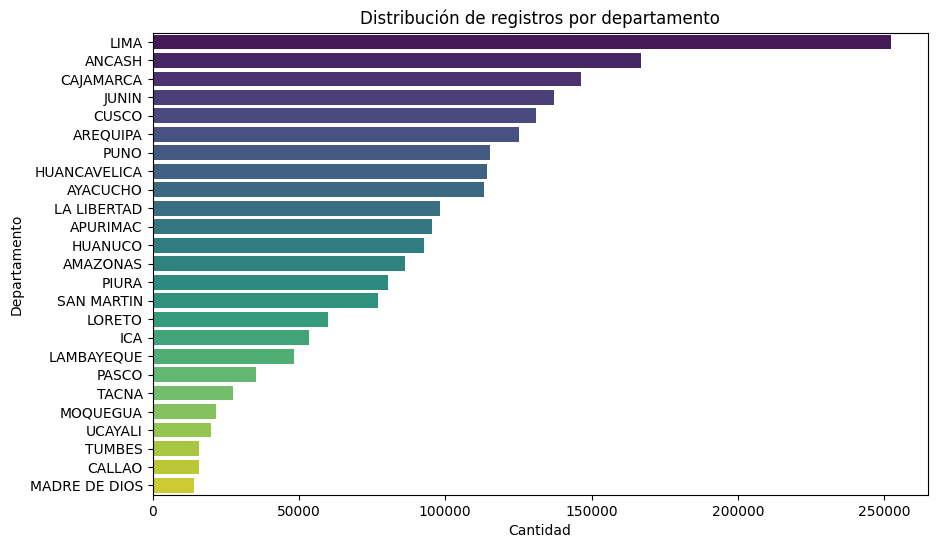

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la frecuencia de cada departamento
freq_df = df['departamento'].value_counts().reset_index()
freq_df.columns = ['departamento', 'Frecuencia']

# Ordenar si deseas mostrar de mayor a menor
freq_df = freq_df.sort_values('Frecuencia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=freq_df,
    y='departamento',
    x='Frecuencia',
    hue='departamento',    # se añade hue
    palette='viridis',
    legend=False          # no mostramos la leyenda
)
plt.title('Distribución de registros por departamento')
plt.xlabel('Cantidad')
plt.ylabel('Departamento')
plt.show()


### Análisis Univariado para provincia

In [89]:
# Crear tabla combinada de conteo y porcentaje
tabla_univariado = pd.DataFrame({
    'Frecuencia': df['provincia'].value_counts(),
    'Porcentaje': (df['provincia'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'provincia':")
tabla_univariado


Análisis univariado de la columna 'provincia':


,Frecuencia,Porcentaje
provincia,,
LIMA,125541,5.86
AREQUIPA,35726,1.67
JAUJA,35228,1.64
HUAROCHIRI,32545,1.52
HUANCAYO,30757,1.43
...,...,...
CONTRALMIRANTE VILLAR,3145,0.15
PUTUMAYO,2269,0.11
ASUNCION,2212,0.10


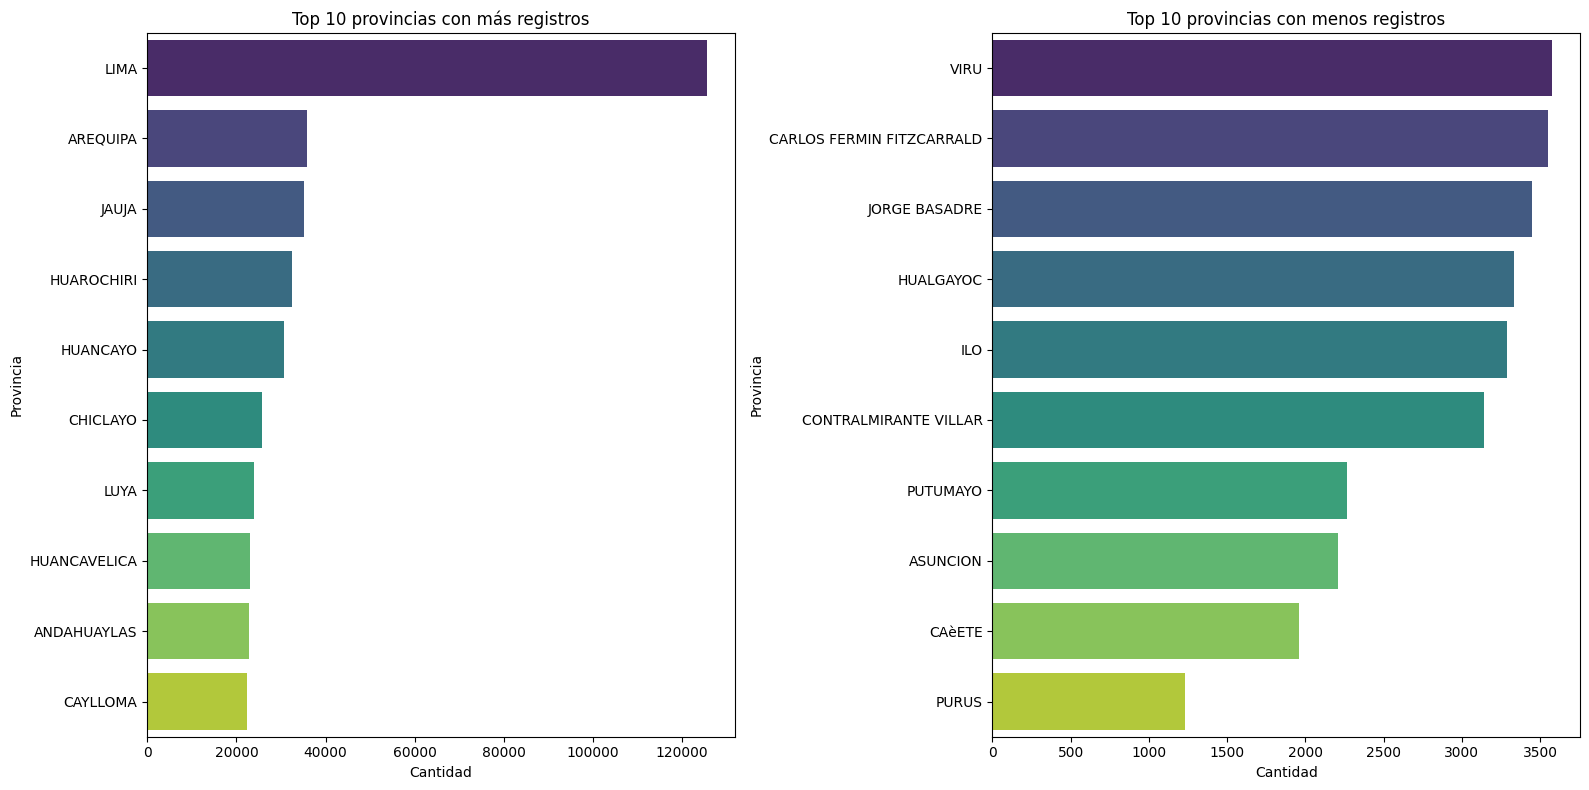

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular frecuencias por provincia
frecuencias = df['provincia'].value_counts()

# Top 10 provincias con más registros
top_10_altas = frecuencias.head(10)

# Top 10 provincias con menos registros
top_10_bajas = frecuencias.tail(10)

# Crear DataFrames auxiliares
df_top_altas = pd.DataFrame({
    'Provincia': top_10_altas.index,
    'Frecuencia': top_10_altas.values
})

df_top_bajas = pd.DataFrame({
    'Provincia': top_10_bajas.index,
    'Frecuencia': top_10_bajas.values
})

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico top 10 altas
sns.barplot(
    data=df_top_altas,
    y='Provincia',
    x='Frecuencia',
    hue='Provincia',
    palette='viridis',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 10 provincias con más registros')
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Provincia')

# Gráfico top 10 bajas
sns.barplot(
    data=df_top_bajas,
    y='Provincia',
    x='Frecuencia',
    hue='Provincia',
    palette='viridis',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Top 10 provincias con menos registros')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Provincia')

plt.tight_layout()
plt.show()


Las provincias con más registros, como Lima, reflejan una alta densidad poblacional y mejor infraestructura de salud y recopilación de datos. En contraste, provincias con menos registros, como Purús, Cabete, Asunción y Putumayo, probablemente tienen poblaciones más reducidas y podrían sufrir de subrepresentación o menor cobertura de datos, especialmente en áreas remotas. Esta disparidad resalta la importancia de considerar el contexto demográfico y la calidad de la recolección de información al interpretar los resultados a nivel provincial.

Para este análisis, debido a la mayor proporción de datos provenientes de la provincia de Lima, trabajaremos únicamente con ese subconjunto de datos:


In [91]:
df = df.query('provincia == "LIMA"')


### Análisis Univariado para distrito

In [92]:
# Crear tabla combinada de conteo y porcentaje
tabla_univariado = pd.DataFrame({
    'Frecuencia': df['distrito'].value_counts(),
    'Porcentaje': (df['distrito'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'distrito':")
tabla_univariado


Análisis univariado de la columna 'distrito':


,Frecuencia,Porcentaje
distrito,,
LIMA,7418,5.91
SAN JUAN DE LURIGANCHO,4750,3.78
SANTIAGO DE SURCO,4217,3.36
SAN MARTIN DE PORRES,4110,3.27
ATE,3902,3.11
LOS OLIVOS,3888,3.10
PACHACAMAC,3756,2.99
SAN JUAN DE MIRAFLORES,3754,2.99
COMAS,3680,2.93


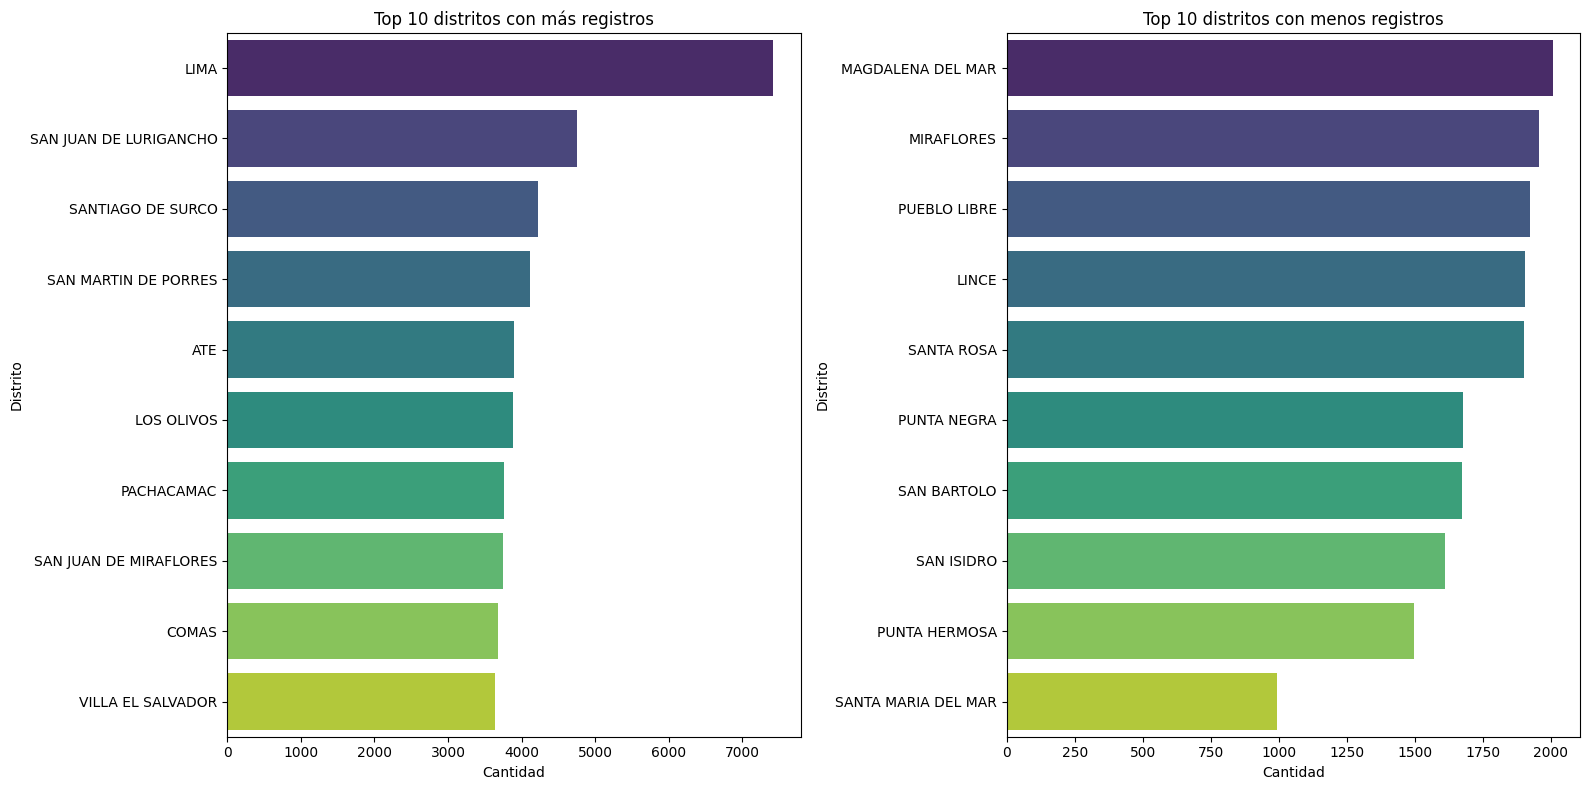

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular frecuencias por distrito
frecuencias = df['distrito'].value_counts()

# Top 10 distritos con más registros
top_10_altas = frecuencias.head(10)

# Top 10 distritos con menos registros
top_10_bajas = frecuencias.tail(10)

# Crear DataFrames auxiliares
df_top_altas = pd.DataFrame({
    'Distrito': top_10_altas.index,
    'Frecuencia': top_10_altas.values
})

df_top_bajas = pd.DataFrame({
    'Distrito': top_10_bajas.index,
    'Frecuencia': top_10_bajas.values
})

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico top 10 altas
sns.barplot(
    data=df_top_altas,
    y='Distrito',
    x='Frecuencia',
    hue='Distrito',
    palette='viridis',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 10 distritos con más registros')
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Distrito')

# Gráfico top 10 bajas
sns.barplot(
    data=df_top_bajas,
    y='Distrito',
    x='Frecuencia',
    hue='Distrito',
    palette='viridis',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Top 10 distritos con menos registros')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Distrito')

plt.tight_layout()
plt.show()


### Análisis Univariado para año

In [94]:
# Crear tabla combinada de conteo y porcentaje para la columna 'ano'
tabla_univariado_ano = pd.DataFrame({
    'Frecuencia': df['ano'].value_counts(),
    'Porcentaje': (df['ano'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'ano':")
tabla_univariado_ano


Análisis univariado de la columna 'ano':


,Frecuencia,Porcentaje
ano,,
2018,6512,5.19
2023,6464,5.15
2019,6454,5.14
2022,6385,5.09
2017,6296,5.02
2016,6295,5.01
2014,5915,4.71
2013,5833,4.65
2015,5808,4.63


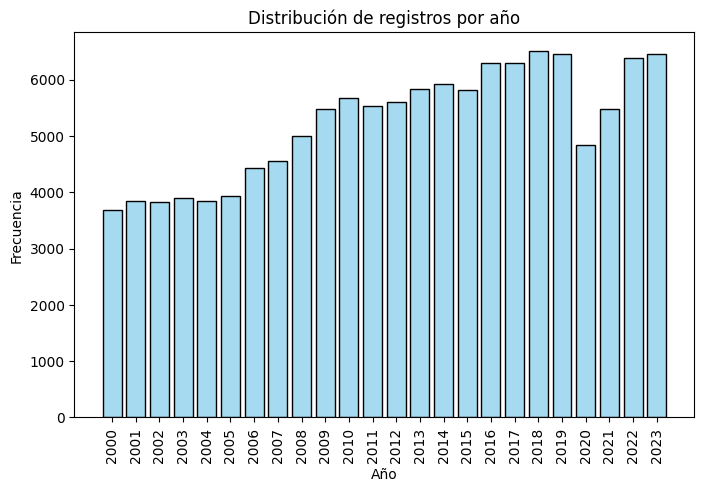

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener todos los años únicos ordenados
all_years = sorted(df['ano'].unique())

plt.figure(figsize=(8, 5))

# Histograma
ax = sns.histplot(
    data=df,
    x='ano',
    discrete=True,
    shrink=0.8,
    color='skyblue'
)

# Forzar etiquetas del eje X en vertical
ax.set_xticks(all_years)
ax.set_xticklabels(all_years, rotation=90)

plt.title('Distribución de registros por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


### Análisis Univariado para semana

In [96]:
# Crear tabla combinada de conteo y porcentaje para la columna 'semana'
tabla_univariado_semana = pd.DataFrame({
    'Frecuencia': df['semana'].value_counts(),
    'Porcentaje': (df['semana'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'semana':")
tabla_univariado_semana


Análisis univariado de la columna 'semana':


,Frecuencia,Porcentaje
semana,,
20,2496,1.99
19,2491,1.98
30,2485,1.98
22,2472,1.97
21,2470,1.97
41,2465,1.96
46,2464,1.96
23,2461,1.96
27,2456,1.96


In [97]:
df_query = df.query('semana == 0')
df_query

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
1446244,LIMA,LIMA,CARABAYLLO,2021,0,51,150106,1,0,0,0,0,0,0


Vamos a proceder a eliminar esta información de semana 0 porque solo representa 1 registro de todo Lima en la semana epidemiológica 0.

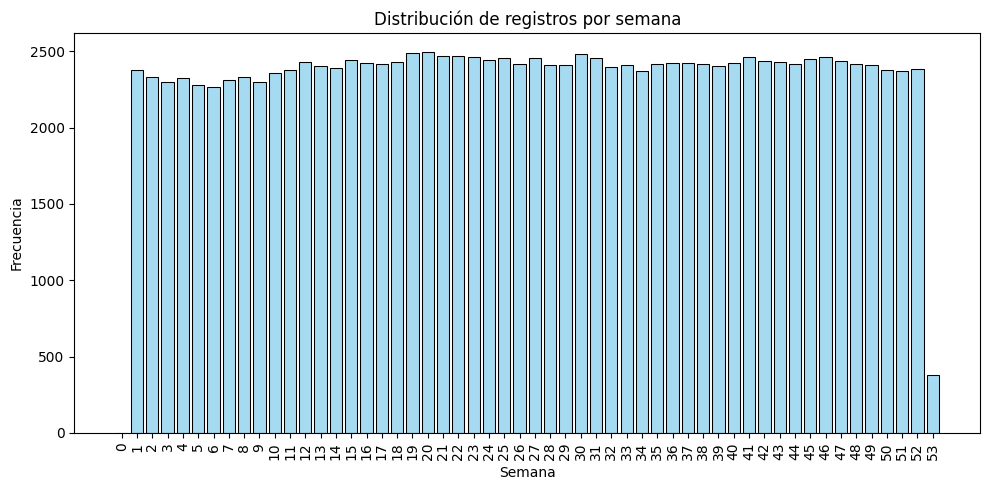

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener todas las semanas únicas ordenadas
all_weeks = sorted(df['semana'].unique())

plt.figure(figsize=(10, 5))  # puedes ajustar el tamaño si hay muchas semanas

# Histograma
ax = sns.histplot(
    data=df,
    x='semana',
    discrete=True,
    shrink=0.8,
    color='skyblue'
)

# Forzar etiquetas del eje X en vertical
ax.set_xticks(all_weeks)
ax.set_xticklabels(all_weeks, rotation=90)

plt.title('Distribución de registros por semana')
plt.xlabel('Semana')
plt.ylabel('Frecuencia')
plt.tight_layout()  # evitar que se corten las etiquetas
plt.show()


Vamos a eliminar la semana 53, ya que contiene pocos registros. Esto se debe a que, en estos estudios de vigilancia epidemiológica, al término del proyecto la cantidad de personas disminuye (puesto que la vigilancia llega a su fin).

In [99]:
df = df.query('semana != 53')


### Análisis Univariado para sub_reg_nt

In [100]:
# Crear tabla combinada de conteo y porcentaje para la columna 'sub_reg_nt'
tabla_univariado_sub_reg_nt = pd.DataFrame({
    'Frecuencia': df['sub_reg_nt'].value_counts(),
    'Porcentaje': (df['sub_reg_nt'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'sub_reg_nt':")
tabla_univariado_sub_reg_nt


Análisis univariado de la columna 'sub_reg_nt':


,Frecuencia,Porcentaje
sub_reg_nt,,
50,47617,38.04
52,19928,15.92
7,19180,15.32
53,18936,15.13
51,15132,12.09
42,1213,0.97
12,662,0.53
13,580,0.46
4,545,0.44


Aún cuando tenemos como objetivo de proyecto poder predecir la cantidad de casos de hospitalizaciones en niños menores de 5 años, vamos a evaluar también la población de personas mayores de 60 años, puesto que resulta importante entender el contexto global de la salud pública.

### Análisis Univariado para ira_no_neumonia

In [101]:
# Crear tabla combinada de conteo y porcentaje para la columna 'ira_no_neumonia'
tabla_univariado_ira_no_neumonia = pd.DataFrame({
    'Frecuencia': df['ira_no_neumonia'].value_counts(),
    'Porcentaje': (df['ira_no_neumonia'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'ira_no_neumonia':")
tabla_univariado_ira_no_neumonia


Análisis univariado de la columna 'ira_no_neumonia':


,Frecuencia,Porcentaje
ira_no_neumonia,,
1,19395,15.50
2,7969,6.37
0,7958,6.36
3,4734,3.78
4,3457,2.76
...,...,...
1343,1,0.00
1846,1,0.00
1675,1,0.00


#### Detección de outliers para ira_no_neumonia

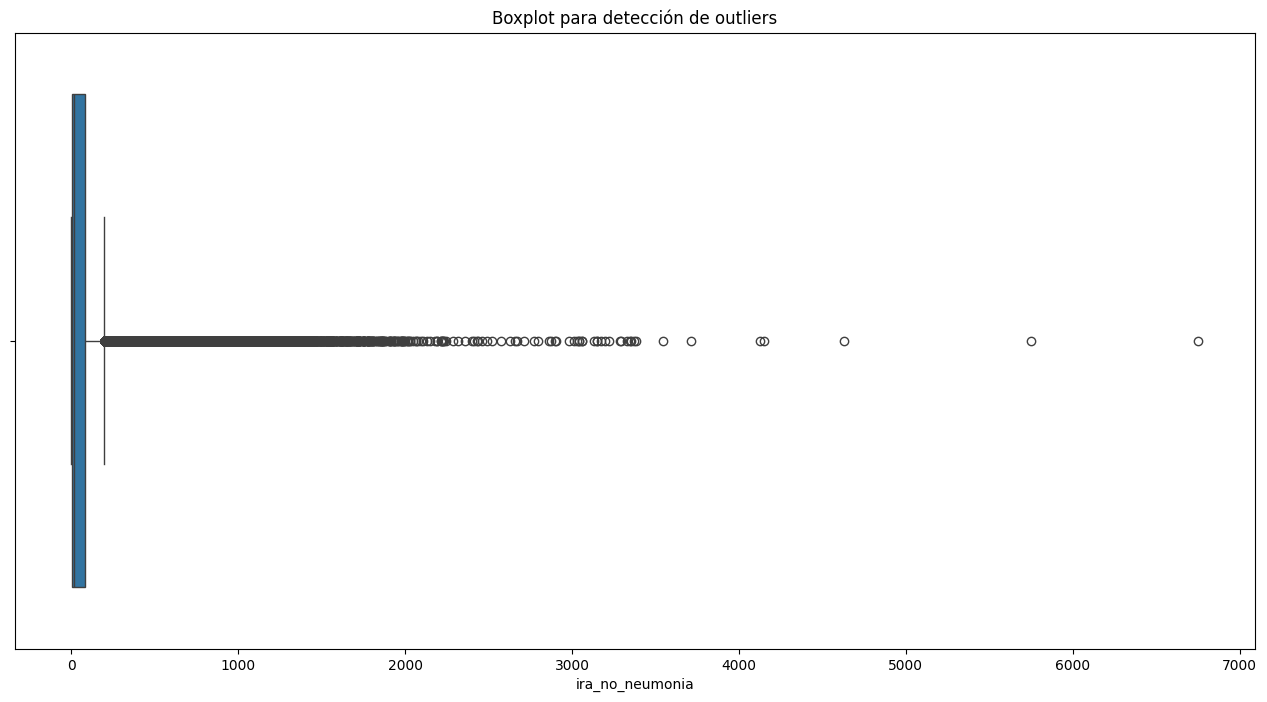

In [102]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['ira_no_neumonia'])
plt.title('Boxplot para detección de outliers')
plt.show()


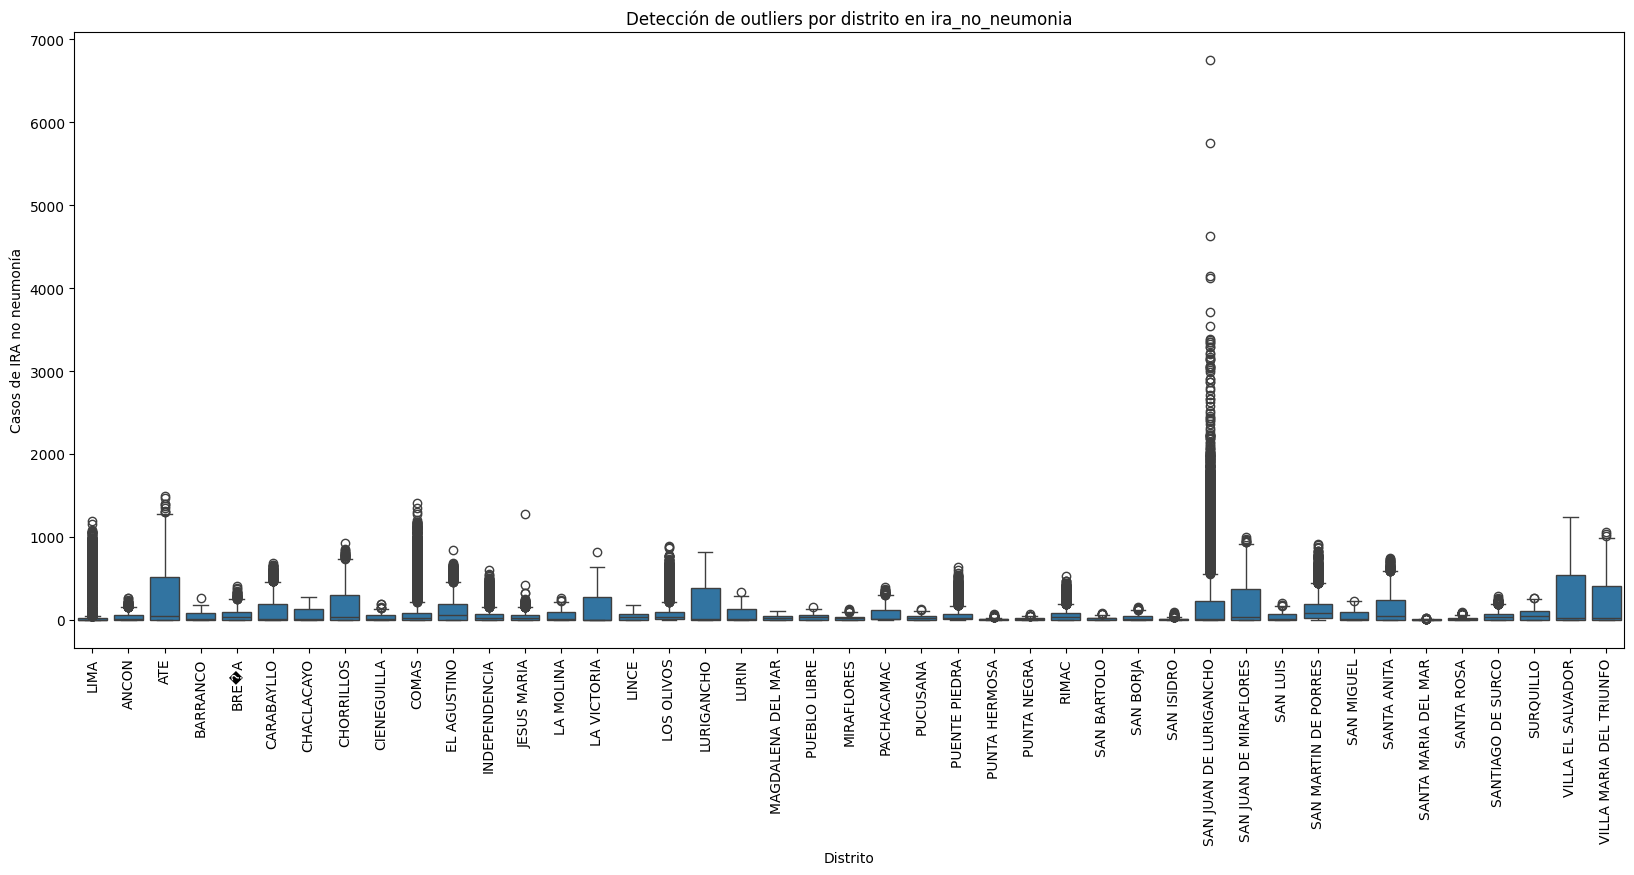

In [104]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='distrito', y='ira_no_neumonia')
plt.title('Detección de outliers por distrito en ira_no_neumonia')
plt.xlabel('Distrito')
plt.ylabel('Casos de IRA no neumonía')
plt.xticks(rotation=90)
plt.show()


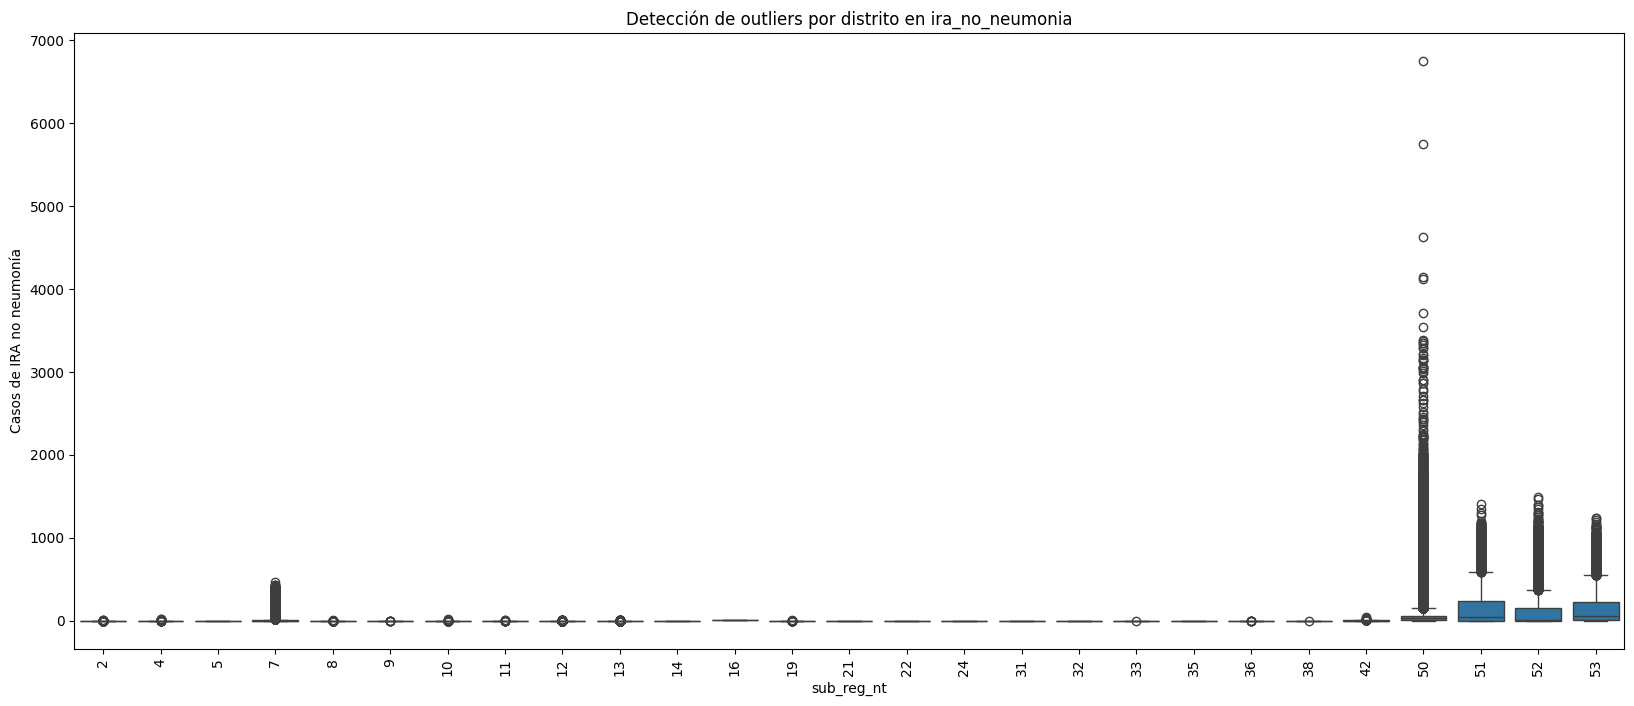

In [105]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='sub_reg_nt', y='ira_no_neumonia')
plt.title('Detección de outliers por distrito en ira_no_neumonia')
plt.xlabel('sub_reg_nt')
plt.ylabel('Casos de IRA no neumonía')
plt.xticks(rotation=90)
plt.show()
